# Kapitel 7 - Jacobi- und Hesse-Matrix

In [1]:
import sys
sys.path.append("../src/") 
from quiz import start_quiz
from utils import css_styling, hide_code
from functionplotter import plt_function
css_styling()

<div class=note>
    <b>Hinweis</b>: Lineare Algebra
    <br>
    <br>Ab diesem Kapitel werden Grundlagen der <b>Linearen Algebra</b> vorausgesetzt. Es wird empfohlen, die Tutorialreihe dazu bereits abgeschlossen oder zumindest so weit behandelt zu haben, dass folgende Verfahren und Methoden bekannt sind und angewendet werden können:<br>
<ul>
    <li>Vektoren</li>
    <li>Matrizen</li>
    <li>Rechnen mit Vektoren und Matrizen (Addition, Multiplikation, Skalarprodukt, etc.)</li>
    <li>TODO: Mehr?</li>
</ul>
</div>

## 1. Kapitelübersicht <a class="anchor" id="1"/>

Im letzten Kapitel haben wir Funktionen mit mehreren Variablen behandelt (**multivariate Funktionen**) und gelernt, wie wir diese nach bestimmten Variablen ableiten können (**partielle Ableitungen**). In diesem Kapitel lernen wir die **Jacobi**-Matrix und **Hesse**-Matrix kennen, die uns erlauben, TODO!!!: ableitungen zu speichern??


<b>Abschnittsübersicht</b><br>

[1. Kapitelübersicht](#1)<br>
TODO

<b>Quizübersicht</b><br>
TODO

<b>Behandelte Themen</b><br>
- TODO

## 2. Jacobi-Matrix <a class="anchor" id="2"/>

### 2.1. Berechnung <a class="anchor" id="2-1"/>

In diesem Abschnitt behandeln wir die **Jacobi-Matrix**. Andere, populäre Begriffe für sie sind **Ableitungsmatrix**, **Funktionalmatrix** oder die englische Bezeichnung **Jacobian**. Am besten wird das, was diese Matrix macht, aber mit dem Begriff der *Ableitungsmatrix* beschrieben. Eine Jacobi-Matrix ist nämlich eine Matrix, die sämtliche partiellen Ableitungen erster Ordnung einer multivariaten Funktion erhält. Schauen wir uns das an einem Beispiel an:<br>

Wir haben die folgende Funktion gegeben:<br>

$f(x, y, z) = x^2 + y + 3z$<br>

Im letzten Kapitel hatten wir gelernt, dass wir für jede Variable (hier: $x$, $y$ und $z$) dieser Funktion eine sogenannte **partielle Ableitung** bilden können. Diese wären in diesem Fall:<br>

$\frac{\partial f}{\partial x} = 2x \qquad \frac{\partial f}{\partial y} = 1 \qquad \frac{\partial f}{\partial z} = 3$<br>

In vielen Fällen wäre es praktisch, alle partiellen Ableitungen erster Ordnung einer multivariaten Funktion zu **speichern**. Dies können wir mit der **Jacobi-Matrix** machen. Unser "Speichermedium" ist dabei ein **Vektor** oder eine **Matrix**. Für die partiellen Ableitungen der oben genannten Funktion brauchen wir lediglich einen Vektor. Wir verwenden hier aus Konventionsgründen einen **Zeilenvektor**:<br>

$J = \begin{bmatrix} \dfrac{\partial f}{\partial x}, \dfrac{\partial f}{\partial y}, \dfrac{\partial f}{\partial z}\end{bmatrix}$<br>

Bezogen auf unser Beispiel sieht unsere Jacobi-Matrix folgendermaßen aus:<br>

$J = \begin{bmatrix} 2x, 1, 3\end{bmatrix}$

### 2.2. Interpretation <a class="anchor" id="2-2"/>

Doch was bedeutet nun dieser Vektor, abseits von seiner Rolle als Speichermedium? Übergeben wir diesem Vektor eine bestimmte $x$-, $y$- und $z$-Koordinante, erhalten wir einen Vektor, der in die Richtung der **steilsten Steigung** der Funktion zeigt. Wie wir uns das vorstellen können, wir am besten durch eine **Visualisierung** deutlich. Wir verwenden hier die folgende Funktion, die anstatt dem gerade eben besprochenen Beispiel nur zwei Variablen $x$ und $y$ enthält: 

$f(x,y) = 3(1-x)^{2} \cdot e^{(-x^{2} - (y+1)^{2})} -10(\frac{x}{5}-x^{3}-y^{5})\cdot e^{(-x^{2}-y^{2})}-\frac{1}{3}\cdot e^{-(x+1)^{2}-y^{2}}$[<sup>1</sup>](#fn1)<br>

Erschrecken Sie sich nicht davor, Sie müssen nichts davon ableiten oder berechnen. Diese Funktion ist nur so kompliziert konstruiert, da wir dadurch einen schönen 3D-Plot erhalten. Dieser wird in der folgenden Code-Zelle geplottet.

<hr style="border: 0.1px solid black;"/>
<span id="fn1" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">1</sup>&nbsp; Die Funktion wurde Woche 2 dieses <a href="https://www.coursera.org/learn/multivariate-calculus-machine-learning">Coursera-Kurses</a> entnommen.</span><br>

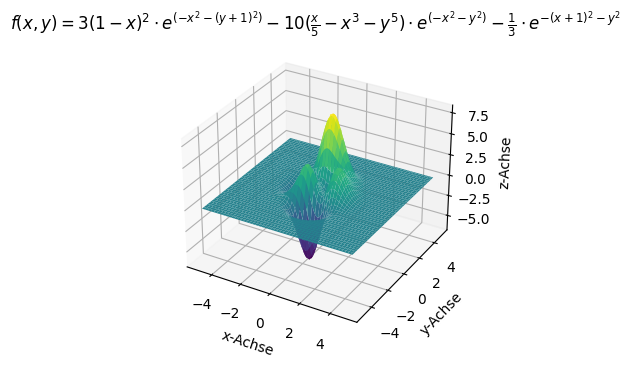

In [2]:
#%matplotlib notebook
plt_function(name="multivariate2", space=(-5.0, 5.0), use_3D=True)

<div class=note>
    <b>Hinweis</b>: Interaktiver Plot
    <br>
    <br>Wenn Sie eine 3D Plot im Notebook interaktiv betrachten möchten, entfernen Sie in der Code-Zeile über <code>plt_function</code> den Kommentar <code>#</code> und aktivieren Sie somit <code>%matplotlib notebook</code>. Damit können Sie innerhalb von Jupyter Notebooks interaktive 3D-Plots erhalten. Wie Sie diesen bedienen, wird in diesem <a href="https://medium.com/@Med1um1/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1">Artikel</a> erklärt. Sollte der interaktive Plot hängen oder ihr Notebook sehr langsam werden (die interaktiven Ressourcen sind sehr ressourcenlastig), starten Sie das Notebook am besten neu und kommentieren Sie die Zeile mit dem <code>%matplotlib notebook</code> wieder aus. 
</div>

Der Plot sieht ein wenig aus wie ein Gebirge. Ihn zeichnen mehrere Maxima aus, wobei das globale Maximum stark hervorsticht, ebenso wie mehrere Minima, wo auch das globale Minimum stark hervorsticht. Wenn man den 3D-Plot nicht interaktiv visualisiert (siehe Hinweis-Box), ist es etwas schwierig, die Minima/Maxima zu erkennen. Dabei kann ein **Konturdiagramm** helfen, welches die Minima und Maxima mit einer bestimmten Farbe kennzeichnet. In Abbildung 1 wird verdeutlicht, wie aus einem Konturdiagramm ein 3D-Plot wird und umgekehrt.[<sup>2</sup>](#fn2)


<hr style="border: 0.1px solid black;"/>
<span id="fn1" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">2</sup>&nbsp; Die Visualisierung wurde Woche 2 dieses <a href="https://www.coursera.org/learn/multivariate-calculus-machine-learning">Coursera-Kurses</a> entnommen.</span><br>

<div class="imgrow">
  <div class="imgcolumn2">
       <figure>
          <img src="img/contour_to_3d.gif" align="left" style="width: 462px;">
          <figcaption>Abbildung 1: Konturdiagramm zu 3D-Plot</figcaption>
    </figure> 
  </div>
  <div class="imgcolumn2">
       <figure>
          <img src="img/contour_vectors.png" align="left" style="width: 430px;">
          <figcaption>Abbildung 2: Vektoren im Konturdiagramm</figcaption>
    </figure> 
  </div>

</div>

TODO!!! erklären mit vektoren in konturdiagramm: https://www.coursera.org/learn/multivariate-calculus-machine-learning/lecture/BfvWV/the-jacobian


TODO: unten den plot auch erklären

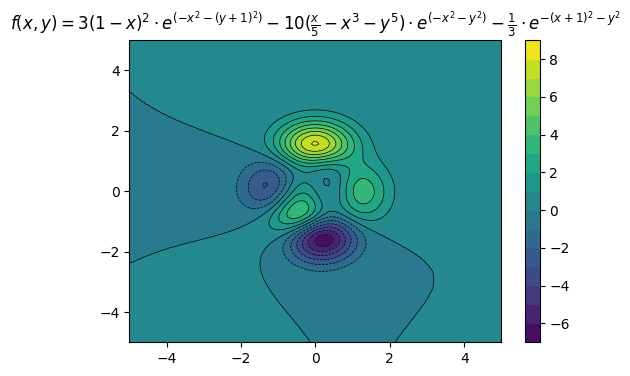

In [3]:
plt_function(name="multivariate2", space=(-5.0, 5.0), use_3D=True, contour_plot=True)

Wir haben nun einen algebraischen Ausdruck für einen Vektor, der, wenn wir ihm eine bestimmte x-, y-, z-Koordinate geben, einen Vektor liefert, der in die Richtung der steilsten Steigung dieser Funktion zeigt

TODO: Nutzen? Wiki: "Genutzt wird die Jacobi-Matrix zum Beispiel zur annähernden Berechnung (Approximation) oder Minimierung mehrdimensionaler Funktionen in der Mathematik." --> ICH: hinweis auf nächste kapitel!
<br><br>


todo: in letzten kaptel hatten wir gesagt dass kuam visualisierungen. warum wird jetzt deutlich. .... ab jetzt viel theoretisches (leider). maplotlib 3d ?
<br><br>
TODO weg?: Wenn wir im Kontext von einer Jacobi-Matrix von Vektoren oder Matrizen sprechen, haben diese weniger die Rolle der *Verschiebung* aus der Linearen Algebra inne, sie sind eher eine Art "Liste".

TODO: kasten mit anmerkung zu notation. sagen, dass schon letztes kapitel neue notation

Somit beginnt ab jetzt ein fließender Übergang von Ableitungsnotationen, da wir in den nächsten Kapiteln anstatt $f'(x)$, $f''(x)$, ..., also die Notation von **Lagrange**, die wir bis jetzt verwendet hatten und die in der Schulmathematik vorwiegend genutzt wurde, nun die Notation von **Leibniz** nutzen werden. Der Notationswechsel fällt Ihnen eventuell etwas schwer, da die Notation von Lagrange den meisten Menschen, die Mathematik nur in der Schule hatten, mehr liegt als die Notation von Leibniz. Der Notationswechsel hat dennoch zwei gute Gründe. Zum einen ist die Leibniz-Notation bei multivariablen Calculus weiter verbreitet. Zum anderen lernen Sie, verschiedene Notationen für Ableitungen zu lesen.Sie werden in der Praxis, d.h. beim Lesen von Papern, Fachbüchern u.ä., vor allem bei englischsprachiger Literatur, mit hoher Wahrscheinlichkeit auf diese Notation stoßen und ein Ziel dieser Tutorialreihe ist es auch, dass Sie in solchen Fällen nicht ratlos vor einer Formel oder einem Ausdruck stehen, sondern wissen, mit was Sie es zu tun haben und im schlimmsten Fall nachschlagen können, was Sie nicht verstehen. Dies geht natürlich nicht, wenn Sie grundlegende Notationen, die die Autoren solcher Literatur voraussetzen, nicht verstehen. Gleiches gilt für griechische Buchstaben.

https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-1/a/derivative-notation-review#:~:text=In%20Lagrange's%20notation%2C%20the%20derivative,functions%20with%20a%20single%20variable.

TODO: erklären wie man matrizen ableitet? macht das überhaupt Sinn, da die ja nur aus Zahlen bestehen? auf jeden Fall erklären, dass Matrixen man sich hier vor allem als große Storage-Boxen vorstellen soll.<br>
TODO: angucken: https://www.youtube.com/watch?v=t8_BvtyVnd0<br>
TODO: auch Gradient hier erklären? ICH: würde thematisch ja passen https://www.massmatics.de/merkzettel/#!201:Der_Gradient